# Feature Selection

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values

    x = dataset[:, :-1]
    y = dataset[:,-1]

    x = x.astype(str)
    return x, y

def prepare_inputs(xtrain, xtest):
    oe = OrdinalEncoder()
    oe.fit(xtrain)
    xtrain_enc = oe.transform(xtrain)
    xtest_enc = oe.transform(xtest)
    
    return xtrain_enc, xtest_enc

def prepare_targets(ytrain, ytest):
    le = LabelEncoder()
    le.fit(ytrain)
    ytrain_enc = le.transform(ytrain)
    ytest_enc = le.transform(ytest)
    
    return ytrain_enc, ytest_enc

x, y = load_dataset("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\BreastCancer.csv")

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_enc, xtest_enc = prepare_inputs(xtrain, xtest)
ytrain_enc, ytest_enc = prepare_targets(ytrain, ytest)

print('Train', xtrain_enc.shape, ytrain_enc.shape)
print('Test', xtest_enc.shape, ytest_enc.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


# Categorical input data when the target variable is also categorical (Categorical Feature Selection) :

## Chi-Squared Feature Selection:

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


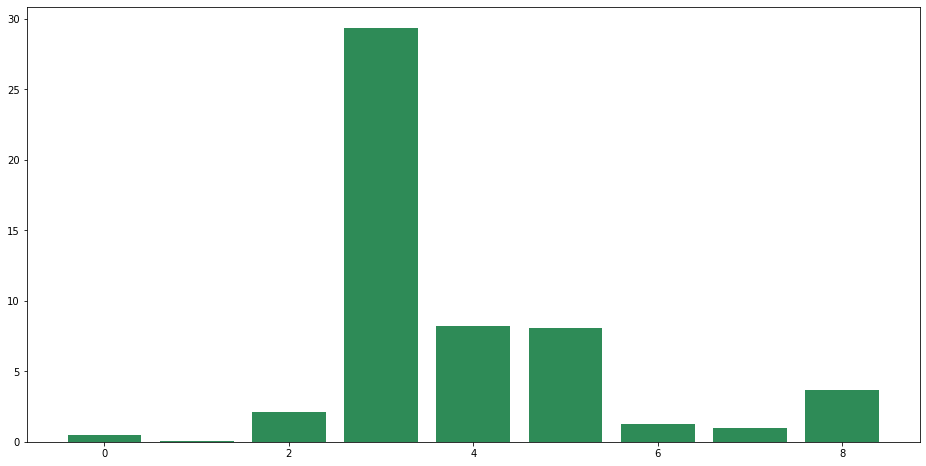

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values

    x = dataset[:, :-1]
    y = dataset[:,-1]

    x = x.astype(str)
    return x, y

def prepare_inputs(xtrain, xtest):
    oe = OrdinalEncoder()
    oe.fit(xtrain)
    xtrain_enc = oe.transform(xtrain)
    xtest_enc = oe.transform(xtest)
    
    return xtrain_enc, xtest_enc

def prepare_targets(ytrain, ytest):
    le = LabelEncoder()
    le.fit(ytrain)
    ytrain_enc = le.transform(ytrain)
    ytest_enc = le.transform(ytest)
    
    return ytrain_enc, ytest_enc

def select_features(xtrain, ytrain, xtest):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(xtrain, ytrain)
    xtrain_fs = fs.transform(xtrain)
    xtest_fs = fs.transform(xtest)
    
    return xtrain_fs, xtest_fs, fs

x, y = load_dataset("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\BreastCancer.csv")

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_enc, xtest_enc = prepare_inputs(xtrain, xtest)
ytrain_enc, ytest_enc = prepare_targets(ytrain, ytest)

xtrain_fs, xtest_fs, fs = select_features(xtrain_enc, ytrain_enc, xtest_enc)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.figure(figsize=(16,8))    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_, color="seagreen")
plt.show()

## Mutual Information Feature Selection:

Feature 0: 0.019654
Feature 1: 0.000116
Feature 2: 0.085856
Feature 3: 0.000000
Feature 4: 0.051495
Feature 5: 0.070729
Feature 6: 0.025941
Feature 7: 0.004189
Feature 8: 0.008768


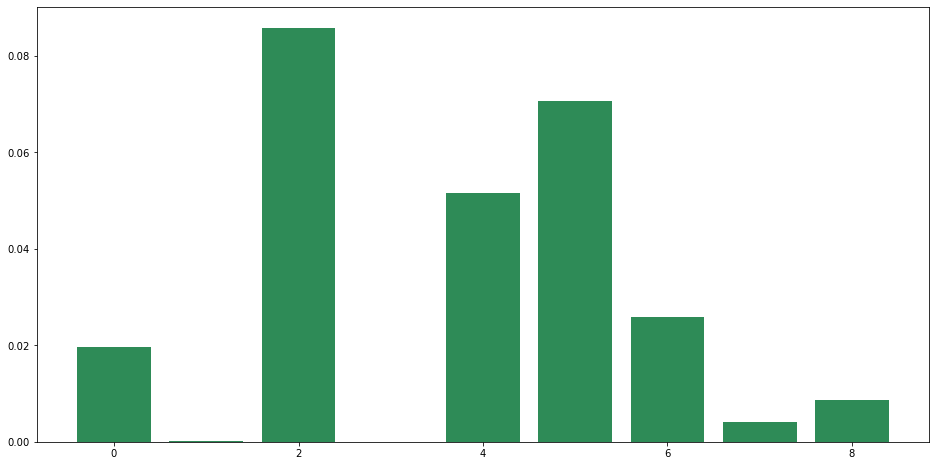

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2, mutual_info_classif

def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values

    x = dataset[:, :-1]
    y = dataset[:,-1]

    x = x.astype(str)
    return x, y

def prepare_inputs(xtrain, xtest):
    oe = OrdinalEncoder()
    oe.fit(xtrain)
    xtrain_enc = oe.transform(xtrain)
    xtest_enc = oe.transform(xtest)
    
    return xtrain_enc, xtest_enc

def prepare_targets(ytrain, ytest):
    le = LabelEncoder()
    le.fit(ytrain)
    ytrain_enc = le.transform(ytrain)
    ytest_enc = le.transform(ytest)
    
    return ytrain_enc, ytest_enc

def select_features(xtrain, ytrain, xtest):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(xtrain, ytrain)
    xtrain_fs = fs.transform(xtrain)
    xtest_fs = fs.transform(xtest)
    
    return xtrain_fs, xtest_fs, fs

x, y = load_dataset("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\BreastCancer.csv")

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_enc, xtest_enc = prepare_inputs(xtrain, xtest)
ytrain_enc, ytest_enc = prepare_targets(ytrain, ytest)

xtrain_fs, xtest_fs, fs = select_features(xtrain_enc, ytrain_enc, xtest_enc)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.figure(figsize=(16, 8))    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_, color="seagreen")
plt.show()

## Model built using all Features:

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values

    x = dataset[:, :-1]
    y = dataset[:,-1]

    x = x.astype(str)
    return x, y

def prepare_inputs(xtrain, xtest):
    oe = OrdinalEncoder()
    oe.fit(xtrain)
    xtrain_enc = oe.transform(xtrain)
    xtest_enc = oe.transform(xtest)
    
    return xtrain_enc, xtest_enc

def prepare_targets(ytrain, ytest):
    le = LabelEncoder()
    le.fit(ytrain)
    ytrain_enc = le.transform(ytrain)
    ytest_enc = le.transform(ytest)
    
    return ytrain_enc, ytest_enc

x, y = load_dataset("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\BreastCancer.csv")

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_enc, xtest_enc = prepare_inputs(xtrain, xtest)
ytrain_enc, ytest_enc = prepare_targets(ytrain, ytest)

model = LogisticRegression(solver='lbfgs')
model.fit(xtrain_enc, ytrain_enc)

yhat = model.predict(xtest_enc)

accuracy = accuracy_score(ytest_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


## Model built using Chi-Squared Features:

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values

    x = dataset[:, :-1]
    y = dataset[:,-1]

    x = x.astype(str)
    return x, y

def prepare_inputs(xtrain, xtest):
    oe = OrdinalEncoder()
    oe.fit(xtrain)
    xtrain_enc = oe.transform(xtrain)
    xtest_enc = oe.transform(xtest)
    
    return xtrain_enc, xtest_enc

def prepare_targets(ytrain, ytest):
    le = LabelEncoder()
    le.fit(ytrain)
    ytrain_enc = le.transform(ytrain)
    ytest_enc = le.transform(ytest)
    
    return ytrain_enc, ytest_enc

def select_features(xtrain, ytrain, xtest):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(xtrain, ytrain)
    xtrain_fs = fs.transform(xtrain)
    xtest_fs = fs.transform(xtest)
    
    return xtrain_fs, xtest_fs, fs

x, y = load_dataset("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\BreastCancer.csv")

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_enc, xtest_enc = prepare_inputs(xtrain, xtest)
ytrain_enc, ytest_enc = prepare_targets(ytrain, ytest)

xtrain_fs, xtest_fs, fs = select_features(xtrain_enc, ytrain_enc, xtest_enc)

model = LogisticRegression(solver='lbfgs')
model.fit(xtrain_fs, ytrain_enc)

yhat = model.predict(xtest_fs)
# evaluate predictions
accuracy = accuracy_score(ytest_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74


## Model built using Mutual Information Features:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values

    x = dataset[:, :-1]
    y = dataset[:,-1]

    x = x.astype(str)
    return x, y

def prepare_inputs(xtrain, xtest):
    oe = OrdinalEncoder()
    oe.fit(xtrain)
    xtrain_enc = oe.transform(xtrain)
    xtest_enc = oe.transform(xtest)
    
    return xtrain_enc, xtest_enc

def prepare_targets(ytrain, ytest):
    le = LabelEncoder()
    le.fit(ytrain)
    ytrain_enc = le.transform(ytrain)
    ytest_enc = le.transform(ytest)
    
    return ytrain_enc, ytest_enc

def select_features(xtrain, ytrain, xtest):
    fs = SelectKBest(score_func=mutual_info_classif, k=4)
    fs.fit(xtrain, ytrain)
    xtrain_fs = fs.transform(xtrain)
    xtest_fs = fs.transform(xtest)
    
    return xtrain_fs, xtest_fs, fs

x, y = load_dataset("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\BreastCancer.csv")

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_enc, xtest_enc = prepare_inputs(xtrain, xtest)
ytrain_enc, ytest_enc = prepare_targets(ytrain, ytest)

xtrain_fs, xtest_fs, fs = select_features(xtrain_enc, ytrain_enc, xtest_enc)

model = LogisticRegression(solver='lbfgs')
model.fit(xtrain_fs, ytrain_enc)

yhat = model.predict(xtest_fs)

accuracy = accuracy_score(ytest_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 67.37


# Numerical input data and a categorical (class) target variable (How to select Numerical Input Features)

## ANOVA F-test Feature Selection:

C:\Users\talk2_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


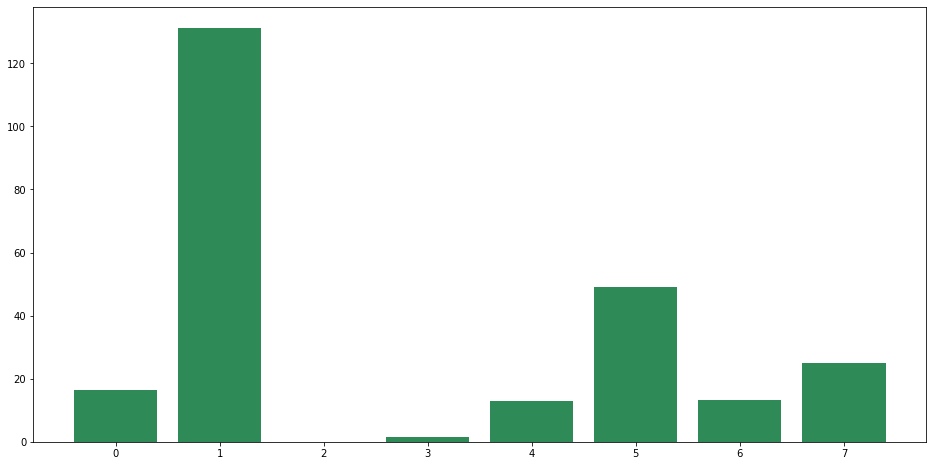

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif


def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values

    x = dataset[:, :-1]
    y = dataset[:,-1]

    x = x.astype(str)
    return x, y


def select_features(xtrain, ytrain, xtest):
    fs = SelectKBest(score_func=f_classif, k='all')

    fs.fit(xtrain, ytrain)

    xtrain_fs = fs.transform(xtrain)

    xtest_fs = fs.transform(xtest)
    return xtrain_fs, xtest_fs, fs

x, y = load_dataset("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\pima-indians-diabetes.csv")

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_fs, xtest_fs, fs = select_features(xtrain, ytrain, xtest)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.figure(figsize=(16, 8))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_, color="seagreen")
plt.show()

## Mutual Information Feature Selection:

C:\Users\talk2_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


Feature 0: 0.015048
Feature 1: 0.094899
Feature 2: 0.038365
Feature 3: 0.001671
Feature 4: 0.041853
Feature 5: 0.066062
Feature 6: 0.010857
Feature 7: 0.056153


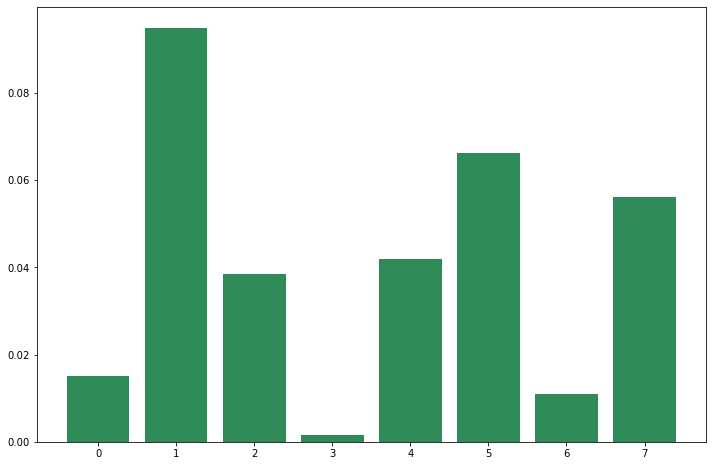

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif


def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values

    x = dataset[:, :-1]
    y = dataset[:,-1]

    x = x.astype(str)
    return x, y


def select_features(xtrain, ytrain, xtest):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')

    fs.fit(xtrain, ytrain)

    xtrain_fs = fs.transform(xtrain)

    xtest_fs = fs.transform(xtest)
    return xtrain_fs, xtest_fs, fs

x, y = load_dataset("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\pima-indians-diabetes.csv")

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_fs, xtest_fs, fs = select_features(xtrain, ytrain, xtest)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.figure(figsize=(12,8))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_, color="seagreen")
plt.show()

## Model built using all Features:

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values

    x = dataset[:, :-1]
    y = dataset[:,-1]

    x = x.astype(str)
    return x, y


x, y = load_dataset("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\pima-indians-diabetes.csv")

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

model = LogisticRegression(solver='liblinear')
model.fit(xtrain, ytrain)

yhat = model.predict(xtest)

accuracy = accuracy_score(ytest, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.56


C:\Users\talk2_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


## Model built using ANOVA F-test Features:

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values

    x = dataset[:, :-1]
    y = dataset[:,-1]

    x = x.astype(str)
    return x, y

def select_features(xtrain, ytrain, xtest):
    fs = SelectKBest(score_func=f_classif, k=4)

    fs.fit(xtrain, ytrain)

    xtrain_fs = fs.transform(xtrain)

    xtest_fs = fs.transform(xtest)
    return xtrain_fs, xtest_fs, fs

x, y = load_dataset("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\pima-indians-diabetes.csv")

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_fs, xtest_fs, fs = select_features(xtrain, ytrain, xtest)

model = LogisticRegression(solver='liblinear')
model.fit(xtrain_fs, ytrain)

yhat = model.predict(xtest_fs)

accuracy = accuracy_score(ytest, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 78.74


C:\Users\talk2_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\talk2_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


## Model Built Using Mutual Information Features:

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values

    x = dataset[:, :-1]
    y = dataset[:,-1]

    x = x.astype(str)
    return x, y

def select_features(xtrain, ytrain, xtest):
    fs = SelectKBest(score_func=mutual_info_classif, k=4)

    fs.fit(xtrain, ytrain)

    xtrain_fs = fs.transform(xtrain)

    xtest_fs = fs.transform(xtest)
    return xtrain_fs, xtest_fs, fs

x, y = load_dataset("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\pima-indians-diabetes.csv")

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_fs, xtest_fs, fs = select_features(xtrain, ytrain, xtest)

model = LogisticRegression(solver='liblinear')
model.fit(xtrain_fs, ytrain)

yhat = model.predict(xtest_fs)

accuracy = accuracy_score(ytest, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.56


C:\Users\talk2_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\talk2_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


## Tune the number of selected Features:

In [23]:
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values

    x = dataset[:, :-1]
    y = dataset[:,-1]

    x = x.astype(str)
    return x, y

x, y = load_dataset("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\pima-indians-diabetes.csv")

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])

grid = dict()
grid['anova__k'] = [i+1 for i in range(x.shape[1])]

search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)

results = search.fit(x, y)

print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.770
Best Config: {'anova__k': 7}


C:\Users\talk2_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


>1 0.748 (0.048)
>2 0.756 (0.042)
>3 0.761 (0.044)
>4 0.759 (0.042)
>5 0.770 (0.041)
>6 0.766 (0.042)
>7 0.770 (0.042)
>8 0.768 (0.040)


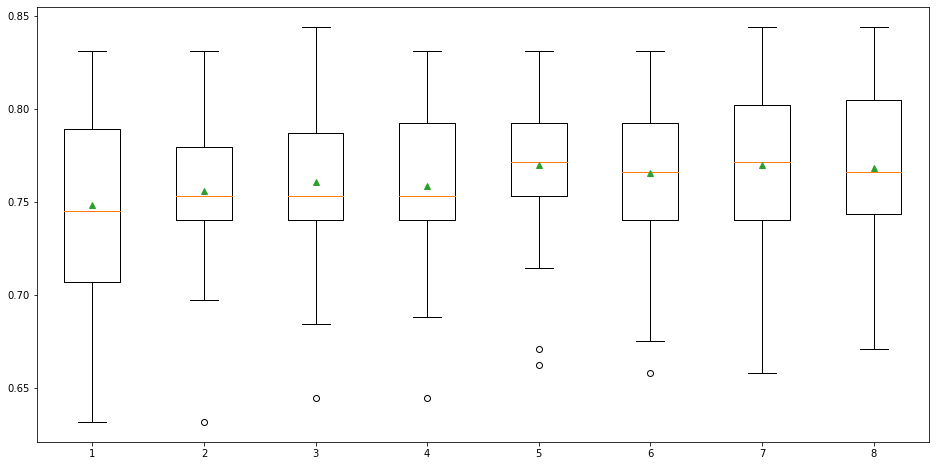

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values

    x = dataset[:, :-1]
    y = dataset[:,-1]

    x = x.astype(str)
    return x, y

 
def evaluate_model(model):    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
    
x, y = load_dataset("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\pima-indians-diabetes.csv")
num_features = [i+1 for i in range(x.shape[1])]
results = list()    

for k in num_features:   
    model = LogisticRegression(solver='liblinear')
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
    # evaluate the model
    scores = evaluate_model(pipeline)
    results.append(scores)
    print('>%d %.3f (%.3f)' % (k, np.mean(scores), np.std(scores)))
    
plt.figure(figsize=(16,8))
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

# Numerical input data and a numerical target variable:

In [25]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

x, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

print('Train', xtrain.shape, ytrain.shape)
print('Test', xtest.shape, ytest.shape)

Train (670, 100) (670,)
Test (330, 100) (330,)


Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

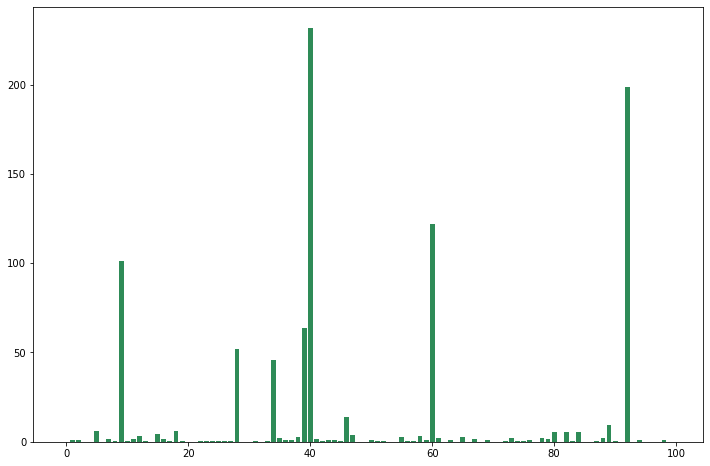

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

def select_features(xtrain, ytrain, xtest):
    fs = SelectKBest(score_func=f_regression, k='all')

    fs.fit(xtrain, ytrain)
    xtrain_fs = fs.transform(xtrain)

    xtest_fs = fs.transform(xtest)
    return xtrain_fs, xtest_fs, fs

x, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_fs, xtest_fs, fs = select_features(xtrain, ytrain, xtest)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.figure(figsize=(12,8))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_, color="seagreen")
plt.show()

Feature 0: 0.045484
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.024816
Feature 5: 0.000000
Feature 6: 0.022659
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.074320
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.000000
Feature 14: 0.020390
Feature 15: 0.004307
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.016566
Feature 19: 0.003688
Feature 20: 0.007579
Feature 21: 0.018640
Feature 22: 0.025206
Feature 23: 0.017967
Feature 24: 0.069173
Feature 25: 0.000000
Feature 26: 0.022232
Feature 27: 0.000000
Feature 28: 0.007849
Feature 29: 0.012849
Feature 30: 0.017402
Feature 31: 0.008083
Feature 32: 0.047321
Feature 33: 0.002829
Feature 34: 0.028968
Feature 35: 0.000000
Feature 36: 0.071652
Feature 37: 0.027969
Feature 38: 0.000000
Feature 39: 0.064796
Feature 40: 0.137695
Feature 41: 0.008732
Feature 42: 0.003983
Feature 43: 0.000000
Feature 44: 0.009387
Feature 45: 0.000000
Feature 46: 0.038385
Feature 47: 0.000000
Fe

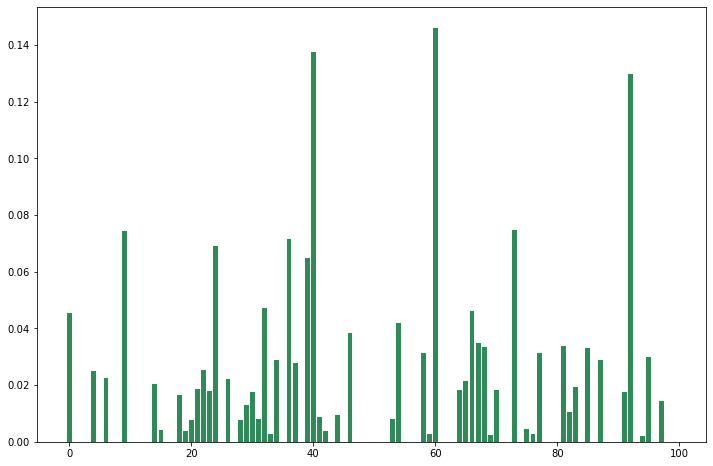

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

def select_features(xtrain, ytrain, xtest):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')

    fs.fit(xtrain, ytrain)
    xtrain_fs = fs.transform(xtrain)

    xtest_fs = fs.transform(xtest)
    return xtrain_fs, xtest_fs, fs

x, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_fs, xtest_fs, fs = select_features(xtrain, ytrain, xtest)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.figure(figsize=(12,8))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_, color="seagreen")
plt.show()

In [28]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

model = LinearRegression()
model.fit(xtrain, ytrain)

yhat = model.predict(xtest)
# evaluate predictions
mae = mean_absolute_error(ytest, yhat)
print('MAE: %.3f' % mae)

MAE: 0.086


In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

def select_features(xtrain, ytrain, xtest):
    fs = SelectKBest(score_func=f_regression, k=10)

    fs.fit(xtrain, ytrain)
    xtrain_fs = fs.transform(xtrain)

    xtest_fs = fs.transform(xtest)
    return xtrain_fs, xtest_fs, fs

x, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_fs, xtest_fs, fs = select_features(xtrain, ytrain, xtest)

model = LinearRegression()
model.fit(xtrain_fs, ytrain)

yhat = model.predict(xtest_fs)

mae = mean_absolute_error(ytest, yhat)
print('MAE: %.3f' % mae)

MAE: 2.740


In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

def select_features(xtrain, ytrain, xtest):
    fs = SelectKBest(score_func=f_regression, k=88)

    fs.fit(xtrain, ytrain)
    xtrain_fs = fs.transform(xtrain)

    xtest_fs = fs.transform(xtest)
    return xtrain_fs, xtest_fs, fs

x, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_fs, xtest_fs, fs = select_features(xtrain, ytrain, xtest)

model = LinearRegression()
model.fit(xtrain_fs, ytrain)

yhat = model.predict(xtest_fs)

mae = mean_absolute_error(ytest, yhat)
print('MAE: %.3f' % mae)

MAE: 0.085


## Model built using Mutual Information Features:

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

def select_features(xtrain, ytrain, xtest):
    fs = SelectKBest(score_func=mutual_info_regression, k=88)

    fs.fit(xtrain, ytrain)
    xtrain_fs = fs.transform(xtrain)

    xtest_fs = fs.transform(xtest)
    return xtrain_fs, xtest_fs, fs

x, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_fs, xtest_fs, fs = select_features(xtrain, ytrain, xtest)

model = LinearRegression()
model.fit(xtrain_fs, ytrain)

yhat = model.predict(xtest_fs)

mae = mean_absolute_error(ytest, yhat)
print('MAE: %.3f' % mae)

MAE: 0.084


## Tune the Number of Selected Features:

In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

x, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

grid = dict()
grid['sel__k'] = [i for i in range(x.shape[1]-20, x.shape[1]+1)]


search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

results = search.fit(x, y)

print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']

for mean, param in zip(means, params):
    print('>%.3f with: %r' % (mean, param))

Best MAE: -0.082
Best Config: {'sel__k': 81}
>-1.100 with: {'sel__k': 80}
>-0.082 with: {'sel__k': 81}
>-0.082 with: {'sel__k': 82}
>-0.082 with: {'sel__k': 83}
>-0.082 with: {'sel__k': 84}
>-0.082 with: {'sel__k': 85}
>-0.082 with: {'sel__k': 86}
>-0.082 with: {'sel__k': 87}
>-0.082 with: {'sel__k': 88}
>-0.083 with: {'sel__k': 89}
>-0.083 with: {'sel__k': 90}
>-0.083 with: {'sel__k': 91}
>-0.083 with: {'sel__k': 92}
>-0.083 with: {'sel__k': 93}
>-0.083 with: {'sel__k': 94}
>-0.083 with: {'sel__k': 95}
>-0.083 with: {'sel__k': 96}
>-0.083 with: {'sel__k': 97}
>-0.083 with: {'sel__k': 98}
>-0.083 with: {'sel__k': 99}
>-0.083 with: {'sel__k': 100}


>100 -0.083 (0.006)


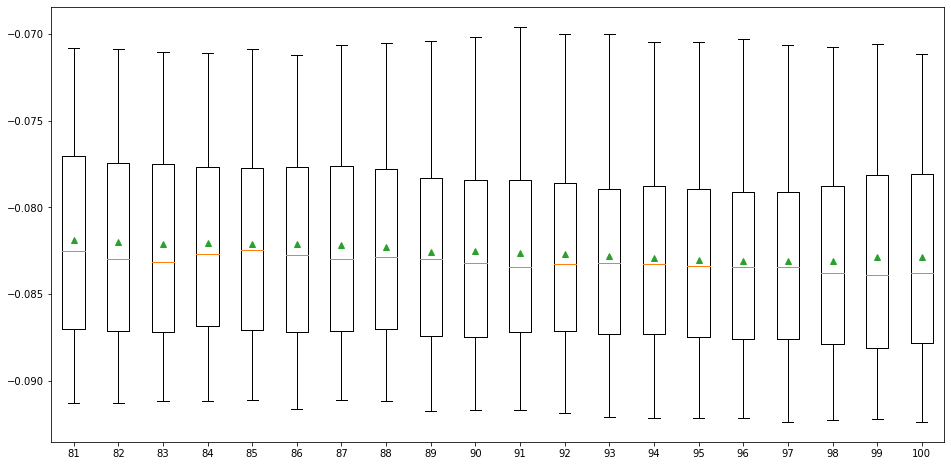

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold, train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

x, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

num_features = [i for i in range(x.shape[1]-19, x.shape[1]+1)]

results = list()
for k in num_features:
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results.append(scores)

print('>%d %.3f (%.3f)' % (k, np.mean(scores), np.std(scores)))

plt.figure(figsize=(16,8))
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

# How to Use RFE for Feature Selection:

## RFE for Classification:

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.883 (0.032)


In [35]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

pipeline.fit(x, y)

data = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = pipeline.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 1


## RFE for Regression:

In [36]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -27.241 (2.667)


In [37]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

pipeline.fit(x, y)
data = [[-2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = pipeline.predict(data)

print('Predicted: %.3f' % (yhat))

Predicted: -84.288


## RFE Hyperparameters:

### Explore number of features:

>2 0.720 (0.046)
>3 0.814 (0.029)
>4 0.875 (0.030)
>5 0.883 (0.025)
>6 0.886 (0.027)
>7 0.887 (0.027)
>8 0.885 (0.024)
>9 0.882 (0.027)


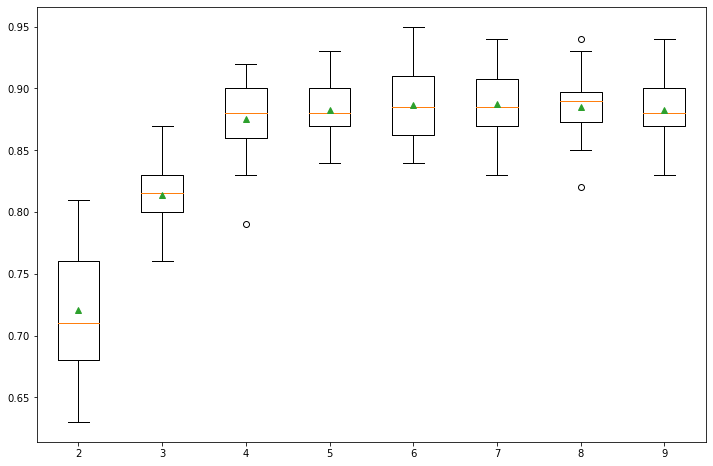

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

def get_dataset():
    x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return x, y

def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

x, y = get_dataset()

models = get_models()
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, x, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

plt.figure(figsize=(12,8))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Automatically select the number of features:

In [39]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.889 (0.028)


### Which features were selected:

In [40]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(x, y)

for i in range(x.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=False, Rank: 4
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 6
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 3
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 2


### Explore base algorithm:

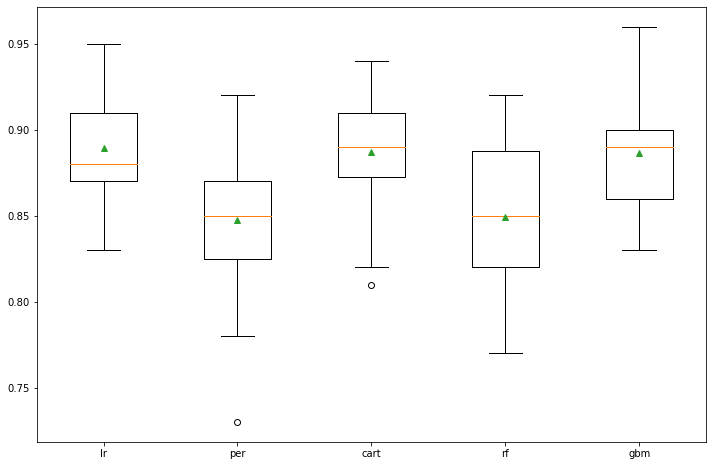

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline


def get_dataset():
    x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return x, y

def get_models():
    models = dict()
    
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])

    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

x, y = get_dataset()

models = get_models()

results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, x, y)
    results.append(scores)
    names.append(name)
    
plt.figure(figsize=(12,8))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# Feature Importance:

## Linear Regression Feature Importance:

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


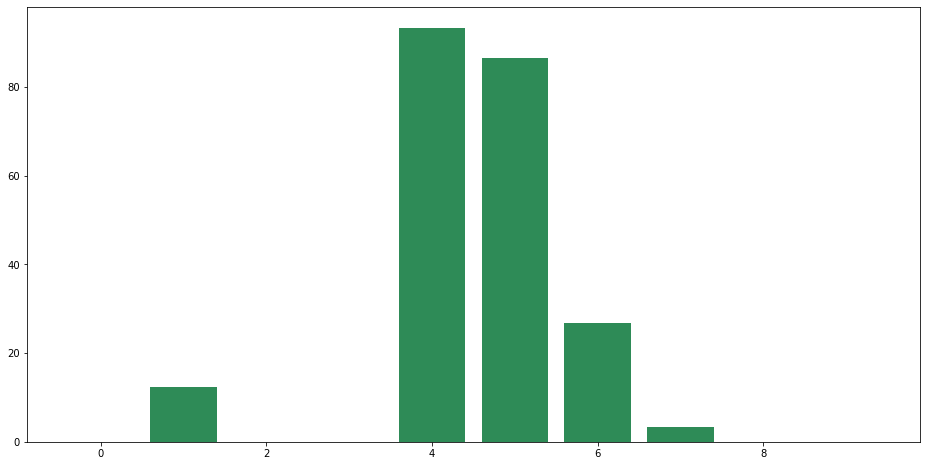

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

model = LinearRegression()
model.fit(x, y)

importance = model.coef_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(16,8))

plt.bar([x for x in range(len(importance))], importance, color="seagreen")
plt.show()

## Logistic Regression Feature Importance:

Feature: 0, Score: 0.15174
Feature: 1, Score: -0.56581
Feature: 2, Score: -0.47250
Feature: 3, Score: -0.14069
Feature: 4, Score: 0.06982
Feature: 5, Score: -0.74609
Feature: 6, Score: 0.12295
Feature: 7, Score: 0.04651
Feature: 8, Score: -0.24610
Feature: 9, Score: -0.22746


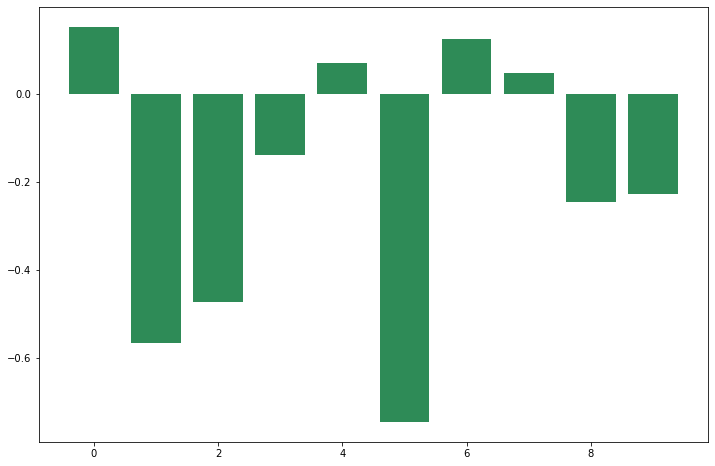

In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=1)

model = LogisticRegression()
model.fit(x, y)

importance = model.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance, color="seagreen")
plt.show()

## Decision Tree Feature Importance:

Feature: 0, Score: 0.00227
Feature: 1, Score: 0.00449
Feature: 2, Score: 0.00269
Feature: 3, Score: 0.00214
Feature: 4, Score: 0.51635
Feature: 5, Score: 0.43835
Feature: 6, Score: 0.02734
Feature: 7, Score: 0.00282
Feature: 8, Score: 0.00243
Feature: 9, Score: 0.00112


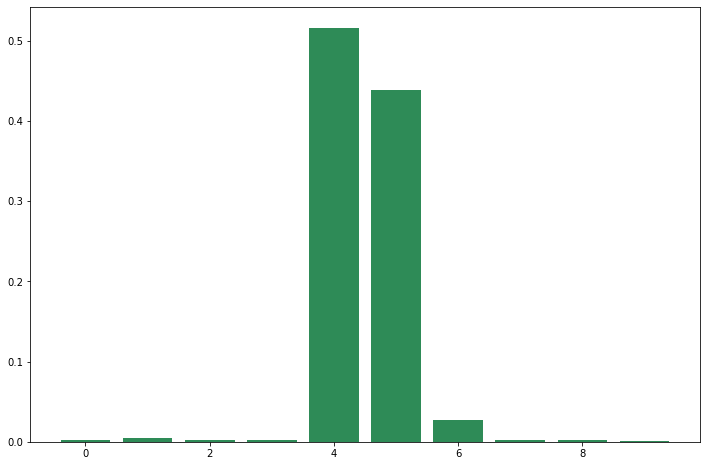

In [44]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

model = DecisionTreeRegressor()
model.fit(x, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance, color="seagreen")
plt.show()

Feature: 0, Score: 0.11842
Feature: 1, Score: 0.06568
Feature: 2, Score: 0.04537
Feature: 3, Score: 0.08917
Feature: 4, Score: 0.02627
Feature: 5, Score: 0.32265
Feature: 6, Score: 0.02220
Feature: 7, Score: 0.01994
Feature: 8, Score: 0.22675
Feature: 9, Score: 0.06354


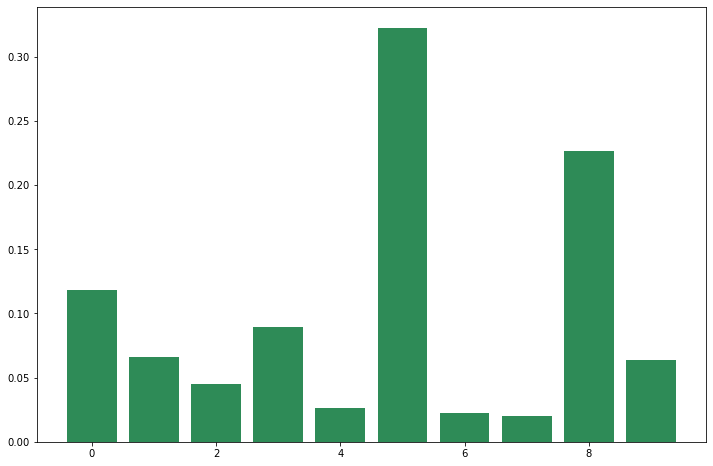

In [45]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=1)

model = DecisionTreeClassifier()
model.fit(x, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance, color="seagreen")
plt.show()

## Random Forest Feature Importance:

### Random Forest Regression Feature Importance:

Feature: 0, Score: 0.00295
Feature: 1, Score: 0.00555
Feature: 2, Score: 0.00292
Feature: 3, Score: 0.00288
Feature: 4, Score: 0.52943
Feature: 5, Score: 0.42144
Feature: 6, Score: 0.02603
Feature: 7, Score: 0.00294
Feature: 8, Score: 0.00308
Feature: 9, Score: 0.00277


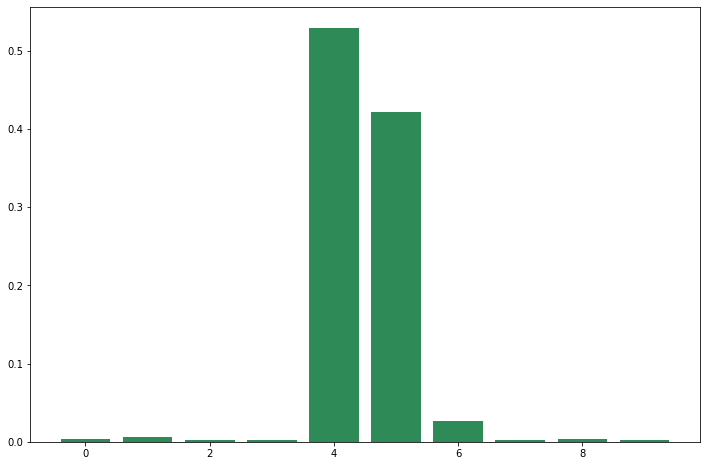

In [46]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

model = RandomForestRegressor()
model.fit(x, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance, color="seagreen")
plt.show()

### Random Forest Classification Feature Importance

Feature: 0, Score: 0.07355
Feature: 1, Score: 0.12478
Feature: 2, Score: 0.11943
Feature: 3, Score: 0.08798
Feature: 4, Score: 0.03125
Feature: 5, Score: 0.24125
Feature: 6, Score: 0.03636
Feature: 7, Score: 0.02749
Feature: 8, Score: 0.12954
Feature: 9, Score: 0.12836


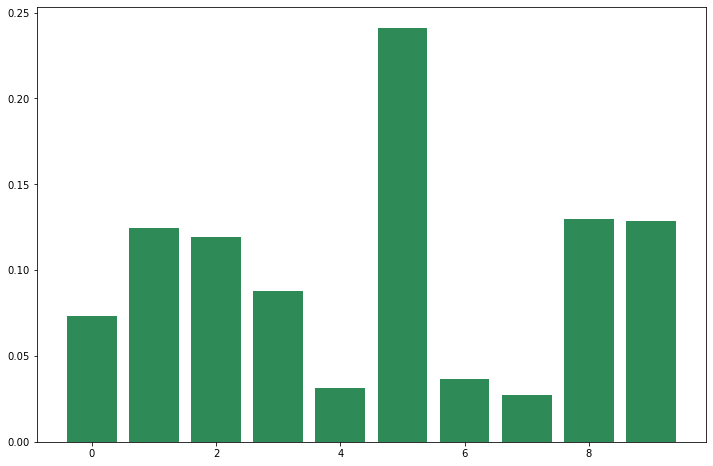

In [47]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=1)

model = RandomForestClassifier()
model.fit(x, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance, color="seagreen")
plt.show()

## Permutation Feature Importance:

Feature: 0, Score: 176.01688
Feature: 1, Score: 343.23450
Feature: 2, Score: 174.13697
Feature: 3, Score: 52.37386
Feature: 4, Score: 9813.95806
Feature: 5, Score: 7982.98863
Feature: 6, Score: 967.36082
Feature: 7, Score: 107.07873
Feature: 8, Score: 110.71381
Feature: 9, Score: 117.72698


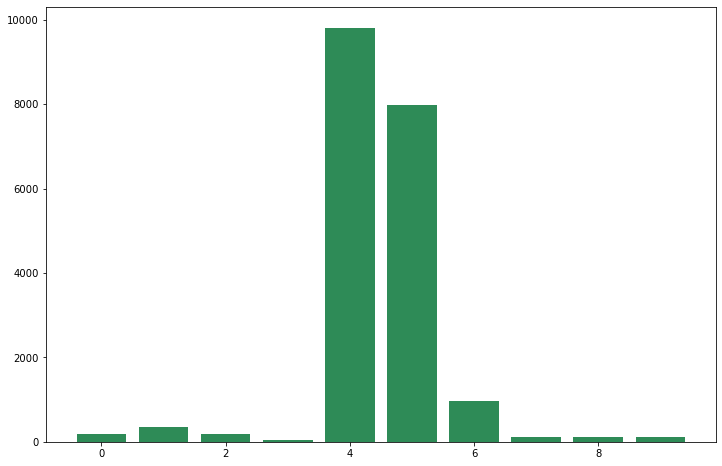

In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

model = KNeighborsRegressor()

model.fit(x, y)

results = permutation_importance(model, x, y, scoring='neg_mean_squared_error')
importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance, color="seagreen")
plt.show()

### Permutation Feature Importance for Regression:

Feature: 0, Score: 0.05260
Feature: 1, Score: 0.06480
Feature: 2, Score: 0.05260
Feature: 3, Score: 0.08900
Feature: 4, Score: 0.05420
Feature: 5, Score: 0.06100
Feature: 6, Score: 0.07760
Feature: 7, Score: 0.05600
Feature: 8, Score: 0.05520
Feature: 9, Score: 0.02540


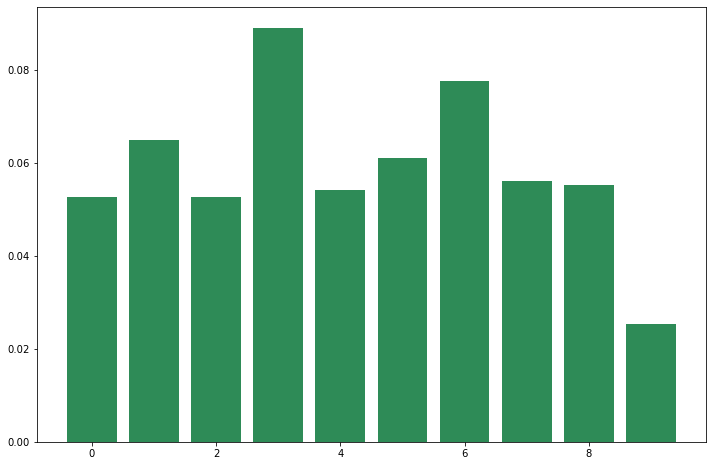

In [49]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

model = KNeighborsClassifier()

model.fit(x, y)

results = permutation_importance(model, x, y, scoring='accuracy')

importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance, color="seagreen")
plt.show()

### Permutation Feature Importance for Classification

In [50]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

model = LogisticRegression(solver='liblinear')
model.fit(xtrain, ytrain)

yhat = model.predict(xtest)

accuracy = accuracy_score(ytest, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


## Feature Selection with Importance:

In [51]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def select_features(xtrain, ytrain, xtest):
    fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
    fs.fit(xtrain, ytrain)
    xtrain_fs = fs.transform(xtrain)
    xtest_fs = fs.transform(xtest)
    return xtrain_fs, xtest_fs, fs


x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

xtrain_fs, xtest_fs, fs = select_features(xtrain, ytrain, xtest)

model = LogisticRegression(solver='liblinear')
model.fit(xtrain_fs, ytrain)

yhat = model.predict(xtest_fs)

accuracy = accuracy_score(ytest, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55
